In [174]:
import csv
import numpy as np 
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd


In [175]:
dates = []
openPrice = []
highest = []
lowest = []
closePrice = []
volumes = []

In [176]:
with open('aapl.csv')as file:
    reader = csv.reader(file)
    for date, Open, high, low, close, volume in reader:
        dates.append(date)
        openPrice.append(Open)
        highest.append(high)
        lowest.append(low)
        closePrice.append(close)
        volumes.append(volume.replace(",", ""))

RSI = rsi last_close - today_close
Moving Average = mv
Volume = vol

In [177]:
years = []
monthes = []
days = []
terms = []

for i in range(len(dates)):
    date_sep = dates[i].split("/")
    year = int(date_sep[2])
    month = int(date_sep[0])
    day = int(date_sep[1])
    years.append(year)
    monthes.append(month)
    days.append(day)
    term = (years[i] - 2024) * 365 + (monthes[i] - 1) * 31 + days[i]
    terms.append(term)



In [178]:
print(terms[0], years[0], days[0], monthes[0])

495 2025 6 5


up = positive gap between yesterday close and todays close
down = negative gap between yesterday close and todays close

ave = average 
rs = relative 
rsi = rs index

In [179]:
ups = []
downs = []
closePrices = []
openPrices = []
highesPrices = []
lowestPrices = []
intvolumes = []


In [180]:
for j in range(len(closePrice)):
    finish = float(closePrice[j])
    openPrices.append(float(openPrice[j]))
    closePrices.append(finish)
    highesPrices.append(float(highest[j]))
    lowestPrices.append(float(lowest[j]))
    intvolumes.append(int(volumes[j]))
    if closePrices[j] >= closePrices[j-1]:
        up = closePrices[j] - closePrices[j-1]
        ups.append(up)
        
    else:
        down = closePrices[j-1] - closePrices[j]
        downs.append(down)

In [181]:
print(type(closePrices[0]), type(openPrices[0]), type(highesPrices[0]), type(lowestPrices[0]), type(intvolumes[0]))

<class 'float'> <class 'float'> <class 'float'> <class 'float'> <class 'int'>


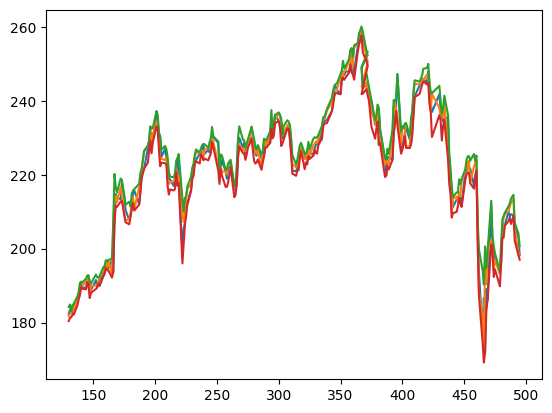

In [182]:
plt.plot(terms, openPrices)
plt.plot(terms, closePrices)
plt.plot(terms, highesPrices)
plt.plot(terms, lowestPrices)


openPrices predict highestPrices

In [183]:
x_train = np.array([openPrices])
y_train = np.array([closePrices])
print(x_train.shape, y_train.shape, len(x_train))


(1, 251) (1, 251) 1


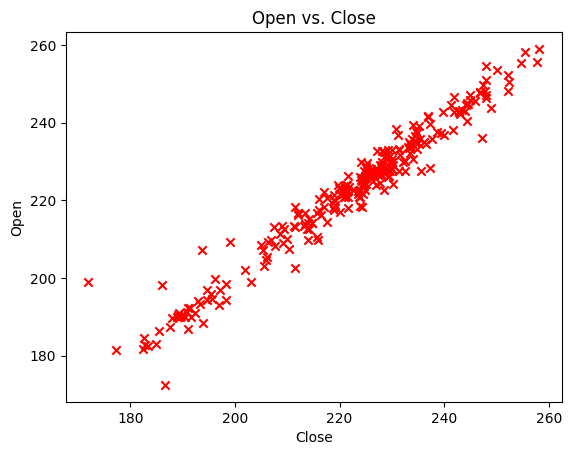

In [184]:
plt.scatter(x_train,y_train, marker='x', c='r')

plt.title("Open vs. Close")
plt.ylabel('Open')
plt.xlabel('Close')
plt.show()

initializer

In [185]:
def initializer(layers_dims):
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [186]:
parameters = initializer([1, 64, 32, 8, 2, 1])

In [187]:
print(x_train.shape, parameters["W1"].shape, parameters["W2"].shape, parameters["W3"].shape, parameters["W4"].shape, parameters["W5"].shape)
print("      ",parameters["b1"].shape, parameters["b2"].shape, parameters["b3"].shape, parameters["b4"].shape, parameters["b5"].shape)


(1, 251) (64, 1) (32, 64) (8, 32) (2, 8) (1, 2)
       (64, 1) (32, 1) (8, 1) (2, 1) (1, 1)


forward

In [188]:
def forward_propagation(parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    b3 = parameters["b3"]
    b4 = parameters["b4"]
    W5 = parameters["W5"]
    b5 = parameters["b5"]

    Z1 = np.dot(W1, x_train) + b1
    Z2 = np.dot(W2, Z1) + b2
    Z3 = np.dot(W3, Z2) + b3
    Z4 = np.dot(W4, Z3) + b4
    Z5 = np.dot(W5, Z4) + b5

    cache = {"Z1":Z1,"Z2":Z2,"Z3":Z3,"Z4":Z4,"Z5":Z5,}

    return cache

In [189]:
cache = forward_propagation(parameters)

In [190]:
print(cache["Z1"].shape, parameters["W1"].shape, parameters["b1"].shape)
print(cache["Z2"].shape, parameters["W2"].shape, parameters["b2"].shape)
print(cache["Z3"].shape, parameters["W3"].shape, parameters["b3"].shape)
print(cache["Z4"].shape, parameters["W4"].shape, parameters["b4"].shape)
print(cache["Z5"].shape, parameters["W5"].shape, parameters["b5"].shape)
print(y_train.shape)

(64, 251) (64, 1) (64, 1)
(32, 251) (32, 64) (32, 1)
(8, 251) (8, 32) (8, 1)
(2, 251) (2, 8) (2, 1)
(1, 251) (1, 2) (1, 1)
(1, 251)


In [191]:
gap = cache["Z5"].T - y_train
print(cache["Z4"].T.shape, gap.shape)

(251, 2) (251, 251)


In [192]:
def backward_propagation(cache, parameters):
    m = x_train.shape[0]
    dZ5 = cache["Z5"] - y_train
    dW5 = 1/m * np.dot(dZ5, cache["Z4"].T)
    db5 = 1/m * np.sum(dZ5, axis=1, keepdims=True)
    
    dA4 = np.dot(parameters["W5"].T, dZ5)
    dZ4 = np.multiply(dA4, np.int64(cache["Z4"] > 0))
    dW4 = 1/m * np.dot(dZ4, cache["Z3"].T)
    db4 = 1/m * np.sum(dZ4, axis=1, keepdims=True)
    
    dA3 = np.dot(parameters["W4"].T, dZ4)
    dZ3 = np.multiply(dA3, np.int64(cache["Z3"] > 0))
    dW3 = 1/m * np.dot(dZ3, cache["Z2"].T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(parameters["W3"].T, dZ3)
    dZ2= np.multiply(dA2, np.int64(cache["Z2"] > 0))
    dW2 = 1/m * np.dot(dZ2, cache["Z1"].T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(parameters["W2"].T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(cache["Z1"] > 0))
    dW1 = 1/m * np.dot(dZ1, x_train.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dZ5":dZ5, "dW5":dW5, "db5":db5,
             "dA4":dA4, "dZ4":dZ4, "dW4":dW4, "db4":db4,
             "dA3":dA3, "dZ3":dZ3, "dW3":dW3, "db3":db3,
             "dA2":dA2, "dZ2":dZ2, "dW2":dW2, "db2":db2,
             "dA1":dA1, "dZ1":dZ1, "dW1":dW1, "db1":db1,}
    
    return grads

In [193]:
grads = backward_propagation(cache, parameters)

In [195]:
def update_parameters(parameters, cache, grads, learning_rate):
    L = int(len(parameters) / 2)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [196]:
parameters = update_parameters(parameters, cache, grads, 0.01)